#                                             SIG720: Machine Learning 

# TASK 3:

## B PRIYANKAA

### s224207694
### priyayj2016@gmail.com

## ABSTRACT:

In order to predict the price of the housing price based on the historical real estate valuation dataset collected from Sindian Dist.,New Taipei City, Taiwan. This is a regression type of problem.

### ABOUT THE DATASET:

1. X1 - Transaction date is a continuous type of feature.
2. No - No is the number which is of an integer type of feature.
3. X2 - House age is a continuous type of feature.
4. X3 - distance to the nearest MRT station(metro) is a continuous type of feature.
5. X4 - number of convenience stores in the living street on foot is an integer type of feature.
6. X5 - latitude is a continuous type of feature.
7. X6 - longitude is a continuous type of feature.
8. Y - It is the Target variable house price of unit area. It  is a continuous type of feature.

## TASKS:

1. To download and read the "Real estate valuation data set.xlsx" dataset using the Pandas Library.
2. To split the dataset in train and test set and to train a linear regression model and report the performance.
3. To use leave-one-out validation and five fold cross validation and report the model performance.
4. To compare the three evaluation methods and suggest which one is more reliable.
5. To apply L1 and L2 regularization on the linear regression model. Compare the performance and indicate key findings.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# 1. Download and read the "Real estate valuation data set.xlsx" dataset. You can find the description of the features and targets on the UCI repository website.


The dataset is downloaded from this "https://archive.ics.uci.edu/dataset/477/real+estate+valuation+data+set". It is saved as **Real_estate_valuation_dataset.csv**.

The first step is to Read the Dataset.

In [3]:
#Pandas library- essential for handling and manipulating data in Python

import pandas as pd

df = pd.read_csv("Real_estate_valuation_dataset.csv")

df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


The **No.** column has to be dropped as it not a neccessary one.

In [4]:
df = df.drop(columns=['No'])
df

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [5]:
import math
import datetime

In [6]:
for i in range(len(df)):
    frac,whole = math.modf(df['X1 transaction date'][i])
    sd12 = datetime.datetime.strptime("12/31/11", "%m/%d/%y")
    sd13 = datetime.datetime.strptime("12/31/11", "%m/%d/%y")
    if whole==12:
        df.loc[i, 'X1 transaction date'] = (sd12 + datetime.timedelta(days = frac*366)).date()
    else:
        df.loc[i, 'X1 transaction date'] = (sd13 + datetime.timedelta(days = frac*365)).date()

In [7]:
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012-11-29,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012-11-29,19.5,306.59470,9,24.98034,121.53951,42.2
2,2012-07-30,13.3,561.98450,5,24.98746,121.54391,47.3
3,2012-06-30,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012-10-30,5.0,390.56840,5,24.97937,121.54245,43.1


- The X1 transaction date column is not in a proper format, so it was converted into "%m/%d/%y" based on the whether the year is a leap year or not.

## DATA EXPLORATION:

In [8]:
print('The shape of the dataset',df.shape)

The shape of the dataset (414, 7)


In [9]:
print('The columns present in the dataset',df.columns)

The columns present in the dataset Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')


In [10]:
print('The datatypes of the columns present are:',df.dtypes.value_counts())

The datatypes of the columns present are: float64    5
object     1
int64      1
dtype: int64


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    object 
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB


This **df.info()** tells us about the datatype of the features and target column.

In [12]:
# Print feature names with the number of missing entries
missing_entries = df.isnull().sum()
print(missing_entries)

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64


### Visualizing a heatmap to understand correlation between all features

In [13]:
df.corr()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
X2 house age,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


Heatmap helps in better understanding of how the features are actually correlated. Dark colours denotes negative correlation and lighter shades denotes positive correlation

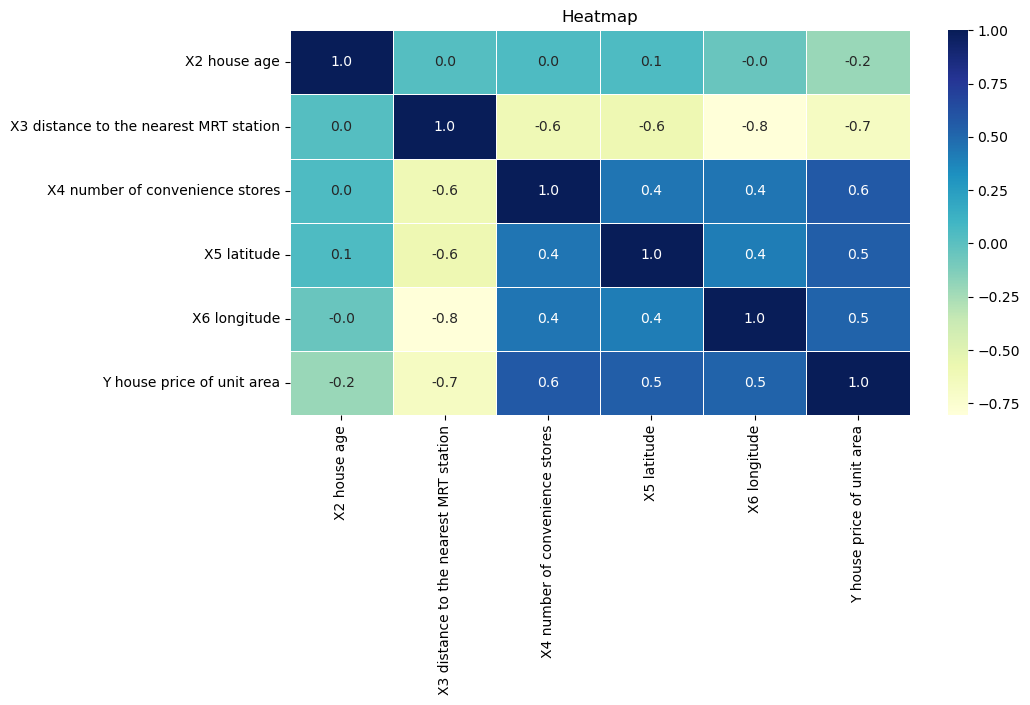

In [14]:
plt.figure(figsize=(10,5))
plt.title('Heatmap')
sns.heatmap(df.corr(), annot=True,linewidths= '.5',fmt ='.1f',cmap = 'YlGnBu')# corr() is used to find the correlation between features and hence visulaised
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.show()

### Conclusion:

#### A. Features having stronger correlation with correlation value:

X4 number of convenience stores has a stronger/ positive correlation value of 0.6 with Y house price of unit area.

#### B. Features having weaker correlation with correlation value:

X4 number of convenience stores has a weaker/ negative correlation value of -0.6 with X3 distance to the nearest MRT station.

In [15]:
df.describe()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


### INSIGHTS ON FIVE-POINT SUMMARY:

1. The minimum age of house can be seen from the "X2 house age" column, it ranges from 0 to the maximum age of house being 44 years.

2. The minimum number of convenience stores	 can be seen from the "X4 number of convenience stores" column, it ranges from 0 to the maximum number of convenience stores being 10.

# 2. Split the dataset in train and test set (use your choice of splitting). Train a linear regression model and report the performance (use your choice of at least three performance metrics).

#### Step 2:

1. To split the dataset in train and test set.

2. To train a linear regression model and report the performance.

In [16]:
X = df.drop(columns='Y house price of unit area')
# X is an independent variable.
y = df['Y house price of unit area']
# y is the target variable.

In [17]:
X.describe()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
count,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361
std,11.392485,1262.109595,2.945562,0.012410,0.015347
min,0.000000,23.382840,0.000000,24.932070,121.473530
25%,9.025000,289.324800,1.000000,24.963000,121.528085
50%,16.100000,492.231300,4.000000,24.971100,121.538630
75%,28.150000,1454.279000,6.000000,24.977455,121.543305
max,43.800000,6488.021000,10.000000,25.014590,121.566270


In [18]:
from scipy.stats import zscore
from sklearn.model_selection import train_test_split

In [19]:
X.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,2012-11-29,32.0,84.87882,10,24.98298,121.54024
1,2012-11-29,19.5,306.59470,9,24.98034,121.53951
2,2012-07-30,13.3,561.98450,5,24.98746,121.54391
3,2012-06-30,13.3,561.98450,5,24.98746,121.54391
4,2012-10-30,5.0,390.56840,5,24.97937,121.54245


 - X1 transaction date column  does not have a very good correlation value with respect to the target variable.

In [20]:
X = X.drop(columns=['X1 transaction date'])
X

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,32.0,84.87882,10,24.98298,121.54024
1,19.5,306.59470,9,24.98034,121.53951
2,13.3,561.98450,5,24.98746,121.54391
3,13.3,561.98450,5,24.98746,121.54391
4,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381
410,5.6,90.45606,9,24.97433,121.54310
411,18.8,390.96960,7,24.97923,121.53986
412,8.1,104.81010,5,24.96674,121.54067


### Scaling Independent variables by applying Z-score: Mean becomes 0 and standard deviation is 1.

In [21]:
X_Scaled = X.apply(zscore)
X_Scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
X2 house age,414.0,-9.225042e-17,1.00121,-1.556639,-0.763492,-0.141717,0.917277,2.292652
X3 distance to the nearest MRT station,414.0,-1.265762e-16,1.00121,-0.841279,-0.630312,-0.469349,0.293827,4.287008
X4 number of convenience stores,414.0,-7.508755e-18,1.00121,-1.391638,-1.051734,-0.032020,0.647789,2.007407
X5 latitude,414.0,1.343166e-13,1.00121,-2.981805,-0.486485,0.166994,0.679693,3.675611
X6 longitude,414.0,-1.614537e-12,1.00121,-3.903223,-0.344198,0.343730,0.648715,2.146891


In [22]:
y.describe()

count    414.000000
mean      37.980193
std       13.606488
min        7.600000
25%       27.700000
50%       38.450000
75%       46.600000
max      117.500000
Name: Y house price of unit area, dtype: float64

In [23]:
y.head()

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: Y house price of unit area, dtype: float64

### test_size is given as 0.3 so that 70% data is used for training and 30% data is used for testing.

In [24]:
X_train, X_test, Y_train, Y_test =train_test_split(X_Scaled,y, test_size=.30,random_state=42) 

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split, LeaveOneOut, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

### Fitting the Linear Regression Model on the training datasets.

In [26]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

### Score of the Linear Regression Models are printed below:

In [27]:
model.score(X_train, Y_train) # Training Model Score.

0.5721696248503624

In [28]:
model.score(X_test, Y_test) #Testing Model Score.

0.5571283505007808

In [29]:
y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)

print(f"MSE: {mse}, R²: {r2}, MAE: {mae}")

MSE: 74.05926303147774, R²: 0.5571283505007808, MAE: 6.151521273181763


### INSIGHTS:

1. Mean_Squared_Error: The primary objective of the MSE is to assess the quality of a model's predictions by measuring how closely they align with the ground truth.The smaller the MSE, the better the model's predictive accuracy.

2. The coefficient of determination, or R2 , is a measure that provides information about the goodness of fit of a model.  A model with a R-squared that is between 0.10 and 0.50 is good.

3. It represents the average absolute gap between the actual values and those predicted by the model. Lower values are better.

**MSE, R² and, MAE needs to be improved**.

# 3. Continue from question 2, use leave-one-out validation and five fold cross validation and report the model performance. Compare the three evaluation methods and suggest which one is more reliable.

### Step 3: 

1. To use leave-one-out validation and five fold cross validation.
2. To report the model performance.
3. To compare the three evaluation methods and suggest which one is more reliable.

### Leave-one-out validation Method:

Leave-One-Out Cross-Validation: LOO CV is a type of of k-fold cross-validation where the number of folds 𝑘 is equal to the number of observations in the dataset. In this method, each data point is used once as a test set while the remaining 𝑛 −1 observations are used for training the model.

In [32]:
from sklearn.model_selection import train_test_split, LeaveOneOut, cross_val_score, KFold

In [36]:
loo = LeaveOneOut()
loo_scores = cross_val_score(model, X_Scaled, y, cv=loo, scoring='neg_mean_squared_error')
mse_loo = -np.mean(loo_scores)
print(f"Leave-One-Out CV MSE: {mse_loo}")

Leave-One-Out CV MSE: 81.68169281258608


### Five-fold cross-validation:

Five-Fold Cross-Validation: It is a commonly used method for evaluating the performance of a machine learning model. It involves splitting the dataset into five equally sized subsets (folds) and using each subset as a test set while the remaining four subsets are used for training.This process is repeated five times, with each fold being used exactly once as the test set. The final performance metric is the average of the performance metrics obtained from each fold.

In [37]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
kf_scores = cross_val_score(model, X_Scaled, y, cv=kf, scoring='neg_mean_squared_error')
mse_kf = -np.mean(kf_scores)
print(f"Five-Fold CV MSE: {mse_kf}")

Five-Fold CV MSE: 81.40057619155372


### Comparison and Reliability:

In [39]:
print("\nComparison of Evaluation Methods:")
print(f"Train-Test Split MSE: {mse}")
print(f"Leave-One-Out CV MSE: {mse_loo}")
print(f"Five-Fold CV MSE: {mse_kf}")


Comparison of Evaluation Methods:
Train-Test Split MSE: 74.05926303147774
Leave-One-Out CV MSE: 81.68169281258608
Five-Fold CV MSE: 81.40057619155372


### INSIGHTS:

#### Comparison and Suggestion

1. Train-Test Split:

Pros: Simple, quick.
Cons: High variance, potential bias.
Best for: Large datasets, quick evaluations.

2. Leave-One-Out CV:

Pros: Maximal data usage, comprehensive validation.
Cons: Computationally expensive, high variance.
Best for: Small datasets, thorough evaluations when computational cost is not an issue.

3. Five-Fold CV:

Pros: Balanced evaluation, robust performance estimate.
Cons: More computationally intensive than train-test split.
Best for: General use, balanced approach for most datasets.


#### Reliability Suggestion:

Five-Fold Cross-Validation is generally the most reliable method for most scenarios because it balances between training and validation data, providing a more robust estimate of model performance without being overly computationally expensive. It reduces the likelihood of overfitting or underfitting and offers a more generalizable performance metric compared to train-test split and LOO CV.

# 4. Continue from question 2, apply L1 and L2 regularization on the linear regression model developed using the same training set. Compare the performance and indicate key findings.


### L1 Regularization:

Least Absolute Shrinkage and Selection Operator(Lasso) called as L1 Regularization is a technique used to prevent overfitting in linear regression models by adding a penalty to the loss function. This penalty is proportional to the absolute value of the coefficients of the model. Lasso can shrink some coefficients to zero, effectively performing feature selection.

### L2 Regularization:
L2 Regularization is known as Ridge Regression, is a technique used to prevent overfitting in linear regression models by adding a penalty to the loss function that is proportional to the square of the magnitude of the coefficients. Unlike L1 Regularization (Lasso), which can shrink some coefficients to zero, L2 Regularization tends to shrink coefficients more evenly without setting any of them exactly to zero.

In [42]:
# Initialize models with regularization
lasso_model = Lasso(alpha=1.0)
ridge_model = Ridge(alpha=1.0)

# Fit models
lasso_model.fit(X_train, Y_train)
ridge_model.fit(X_train, Y_train)

# Make predictions
y_pred_lasso = lasso_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)

# Calculate the mean squared error
mse_lasso = mean_squared_error(Y_test, y_pred_lasso)
mse_ridge = mean_squared_error(Y_test, y_pred_ridge)

print(f"Lasso Regression (L1) MSE: {mse_lasso}")
print(f"Ridge Regression (L2) MSE: {mse_ridge}")

# Perform 5-Fold Cross-Validation for Lasso
kf = KFold(n_splits=5, shuffle=True, random_state=42)
kf_scores_lasso = cross_val_score(lasso_model, X_Scaled, y, cv=kf, scoring='neg_mean_squared_error')
mse_kf_lasso = -np.mean(kf_scores_lasso)
print(f"Five-Fold CV Lasso Regression MSE: {mse_kf_lasso}")

# Perform 5-Fold Cross-Validation for Ridge
kf_scores_ridge = cross_val_score(ridge_model, X_Scaled, y, cv=kf, scoring='neg_mean_squared_error')
mse_kf_ridge = -np.mean(kf_scores_ridge)
print(f"Five-Fold CV Ridge Regression MSE: {mse_kf_ridge}")

Lasso Regression (L1) MSE: 75.6839555069207
Ridge Regression (L2) MSE: 73.95102849710882
Five-Fold CV Lasso Regression MSE: 83.5483885437807
Five-Fold CV Ridge Regression MSE: 81.38746787284644


### INSIGHTS:

Comparing the MSE values for Lasso and Ridge regression with the MSE values obtained from the plain linear regression model (with regularization).

1. Ridge Regression (L2) and Five-Fold CV Ridge Regression has lesser MSE compared to that of Lasso Regression (L1) and Five-Fold CV Lasso Regression.

2. The Ridge Regression (L2) shrinks coefficients more evenly, reducing their magnitude but not eliminating any. This helps in reducing model complexity and handling multicollinearity.

3. Ridge regression can be more stable in the presence of multicollinearity (when predictors are highly correlated).

# REFERENCE:

1. I.-C. Yeh, "Real Estate Valuation Data Set," UCI Machine Learning Repository, Aug. 2018. [Online]. Available: https://archive.ics.uci.edu/dataset/477/real+estate+valuation+data+set

2. F. Dijkinga, "Explaining L1 and L2 Regularization in Machine Learning," Medium, Mar. 22, 2018. [Online]. Available: https://medium.com/@fernando.dijkinga/explaining-l1-and-l2-regularization-in-machine-learning-2356ee91c8e3

3. J. Brownlee, "LOOCV for evaluating machine learning algorithms," Machine Learning Mastery, Jul. 2, 2020. [Online]. Available: https://machinelearningmastery.com/loocv-for-evaluating-machine-learning-algorithms/. 

4. J. Brownlee, "A Gentle Introduction to k-fold Cross-Validation," Machine Learning Mastery, Aug. 3, 2020. [Online]. Available: https://machinelearningmastery.com/k-fold-cross-validation/.